In [1]:
import os 
import pandas as pd
adult_filename = "adult.data"


In [2]:
adult = pd.read_csv(adult_filename,header= None, names = ["Age", "Work-Class", "fnlwgt", "Education", "Education-Num", "Marital-Status","Occupation","Relationship",  "Race", "Sex", "Capital-gain","Capital-loss","Hours-per-week","Native_Country", "Earnings-Raw"])

In [3]:
adult.dropna(how = 'all',inplace= True)

In [4]:
adult.columns

Index(['Age', 'Work-Class', 'fnlwgt', 'Education', 'Education-Num',
       'Marital-Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Native_Country',
       'Earnings-Raw'],
      dtype='object')

In [5]:
adult["Hours-per-week"].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: Hours-per-week, dtype: float64

In [6]:
adult["Education-Num"].median()

10.0

In [7]:
adult.head()

,Age,Work-Class,fnlwgt,Education,Education-Num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native_Country,Earnings-Raw
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
adult["Work-Class"].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay', ' Never-worked'], dtype=object)

In [9]:
adult["Work-Class"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Work-Class, dtype: int64

In [10]:
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 7]

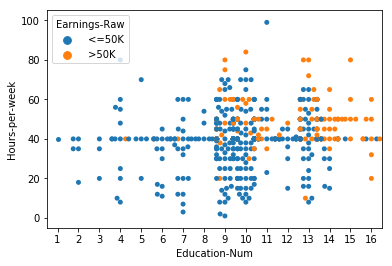

In [11]:
sns.swarmplot(x="Education-Num", y="Hours-per-week", hue = "Earnings-Raw", data=adult[::50])

In [12]:
adult["LongHours"] = adult["Hours-per-week"]>40

In [13]:
import numpy as np
X = np.arange(30).reshape((10,3))

In [14]:
print(X)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]
 [15 16 17]
 [18 19 20]
 [21 22 23]
 [24 25 26]
 [27 28 29]]


In [15]:
X[:,1] = 1

In [16]:
print(X)

[[ 0  1  2]
 [ 3  1  5]
 [ 6  1  8]
 [ 9  1 11]
 [12  1 14]
 [15  1 17]
 [18  1 20]
 [21  1 23]
 [24  1 26]
 [27  1 29]]


In [17]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold()
Xt = vt.fit_transform(X)

In [18]:
print(Xt)

[[ 0  2]
 [ 3  5]
 [ 6  8]
 [ 9 11]
 [12 14]
 [15 17]
 [18 20]
 [21 23]
 [24 26]
 [27 29]]


In [19]:
print(vt.variances_)

[ 74.25   0.    74.25]


In [20]:
X = adult[["Age", "Education-Num","Capital-gain","Capital-loss", "Hours-per-week"]].values

In [21]:
y = (adult["Earnings-Raw"] == " >50K").values

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [23]:
transformer = SelectKBest(score_func = chi2, k=3)

In [24]:
Xt_chi2 = transformer.fit_transform(X, y)

In [25]:
print(transformer.scores_)

[  8.60061182e+03   2.40142178e+03   8.21924671e+07   1.37214589e+06
   6.47640900e+03]


In [26]:
from scipy.stats import pearsonr

In [27]:
def multivariate_pearsonr(X, y):
    scores, pvalues = [],[]
    for column in range(X.shape[1]):
        # Compute the Pearson correlationfor this column only
        cur_score, cur_p = pearsonr(X[:,column], y)
        # Record both the scoreand p-value.
        scores.append(abs(cur_score))
        pvalues.append(cur_p)
    return(np.array(scores),np.array(pvalues))

In [28]:
transformer = SelectKBest(score_func = multivariate_pearsonr, k = 3)
Xt_pearson = transformer.fit_transform(X,y)
print(transformer.scores_)

[ 0.2340371   0.33515395  0.22332882  0.15052631  0.22968907]


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [30]:
clf = DecisionTreeClassifier (random_state = 14)
scores_chi2 = cross_val_score(clf, Xt_chi2, y, scoring = 'accuracy')
scores_pearson = cross_val_score(clf, Xt_pearson, y, scoring = 'accuracy')

/Users/Claire/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/Claire/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [31]:
print("Chis score: {:.3f}".format(scores_chi2.mean()))
print("Pearson score:{:.3f}".format(scores_pearson.mean()))

Chis score: 0.829
Pearson score:0.771


In [32]:
from sklearn.base import TransformerMixin
from sklearn.utils import as_float_array

In [33]:
class MeanDiscrete(TransformerMixin):
    def fit(self, X, y = None):
        X = as_float_array(X)
        self.mean = X.mean(axis = 0)
        return self
    def transform(self, X, y = None):
        X = as_float_array(X)
        assert X.shape[1] == self.mean.shape[0]
        return X>self.mean

In [34]:
mean_discrete = MeanDiscrete()
X_mean = mean_discrete.fit_transform(X)

In [35]:
from numpy.testing import assert_array_equal

In [36]:
def test_meandiscrete():
    X_test = np.array([[0,2],
                       [3,5],
                       [6,8],
                       [9,11],
                       [12,14],
                       [15,17],
                       [18,20],
                       [21,23],
                       [24,26],
                       [27,29]])
    mean_discrete = MeanDiscrete()
    mean_discrete.fit(X_test)
    assert_array_equal(mean_discrete.mean, np.array([13.5,15.5]))
    X_transformed = mean_discrete.transform(X_test)
    X_expected = np.array([[0,0],
                          [0,0],
                           [0,0],
                           [0,0],
                           [0,0],
                           [1,1],
                           [1,1],
                           [1,1],
                           [1,1],
                           [1,1],
                          ])
    assert_array_equal(X_transformed, X_expected)

In [37]:
test_meandiscrete()

In [38]:
from sklearn.pipeline import Pipeline

In [39]:
pipeline = Pipeline([('mean_discrete', MeanDiscrete()), ('classifier', DecisionTreeClassifier(random_state=14))])
scores_mean_discrete = cross_val_score(pipeline, X,y,scoring ='accuracy')
print("Mean Discrete performance:{0:.3f}".format(scores_mean_discrete.mean()))

Mean Discrete performance:0.803


/Users/Claire/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
